# Computing Allan variance and noise parameters from it

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from allan_variance import allan_variance, params_from_avar

First generate a model signal containing additive white noise, random walk and deterministic ramp:

In [5]:
def generate_signal(n, dt, q_white, q_walk, q_ramp, random_state=0):
    rng = np.random.RandomState(random_state)
    white = q_white * rng.randn(n) * dt ** 0.5
    walk = q_walk * dt ** 0.5 * np.cumsum(rng.randn(n))    
    ramp = q_ramp * dt * np.arange(n)
    return white + walk * dt + ramp * dt

In [6]:
dt = 1e-2

In [7]:
x = generate_signal(1000000, dt, 0.1, 0.05, 0.002)

Now compute AV curve using `allan_variance` function:

In [8]:
tau, av = allan_variance(x, dt, input_mode="mean")

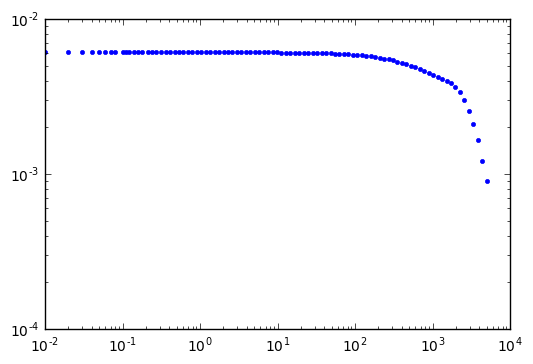

In [9]:
plt.loglog(tau, av, '.')

We clearly see a part with a slope of -1 corresponding to the white noise. At large averaging times AV is dominated by the linear ramp (slope is +2). The random walk part is located between them.

We can automatically estimate the noise magnitudes using `params_from_avar` function:

In [10]:
params, av_pred = params_from_avar(tau, av)

In [11]:
params

array([ 0.        ,  0.00798799,  0.08659797,  0.        ,  0.        ])

The second value corresponds to the white noise and it's close to 0.1, the fourth value corresponds to the random walk and it's close to 0.05 and the last value corresponds to the linear ramp and it is close to 0.002. The two other parameters are insignificant. So we see that the procedure works quite well.

Finally we display the estimated AV curve along with computed actual values:

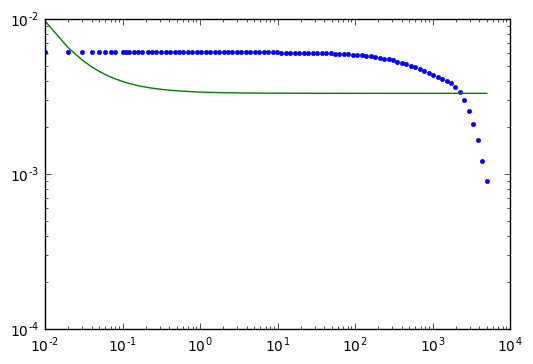

In [12]:
plt.loglog(tau, av, '.')
plt.loglog(tau, av_pred)